In [2]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
y_test2 = y_test.copy()

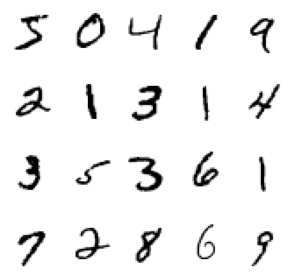

In [5]:
plt.figure(figsize=(5,5))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_train[i], cmap='Greys')
    plt.axis('off')
plt.show()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train = x_train.reshape(60000,784).astype('float32')
x_test = x_test.reshape(10000,784).astype('float32')

In [9]:
x_test.shape

(10000, 784)

In [10]:
x_train/=255
x_test/=255

In [11]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
n_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, n_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, n_classes)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
model = keras.Sequential()

In [15]:
model.add(keras.layers.Dense(64, activation = 'sigmoid', input_shape=(784,)))

In [16]:
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = 'mean_squared_error', optimizer = SGD(learning_rate = 0.01),
              metrics = ['accuracy'])

In [19]:
history = model.fit(x_train, y_train, batch_size = 70, epochs = 100, verbose = 1)

Epoch 1/75
858/858 [==============================] - 1s 941us/step - loss: 0.0914 - accuracy: 0.1082
Epoch 2/75
858/858 [==============================] - 1s 913us/step - loss: 0.0904 - accuracy: 0.1420
Epoch 3/75
858/858 [==============================] - 1s 905us/step - loss: 0.0897 - accuracy: 0.2079
Epoch 4/75
858/858 [==============================] - 1s 923us/step - loss: 0.0891 - accuracy: 0.2553
Epoch 5/75
858/858 [==============================] - 1s 913us/step - loss: 0.0885 - accuracy: 0.2799
Epoch 6/75
858/858 [==============================] - 1s 913us/step - loss: 0.0880 - accuracy: 0.2971
Epoch 7/75
858/858 [==============================] - 1s 920us/step - loss: 0.0875 - accuracy: 0.3173
Epoch 8/75
858/858 [==============================] - 1s 919us/step - loss: 0.0869 - accuracy: 0.3622
Epoch 9/75
858/858 [==============================] - 1s 917us/step - loss: 0.0864 - accuracy: 0.4149
Epoch 10/75
858/858 [==============================] - 1s 900us/step - loss: 0.085

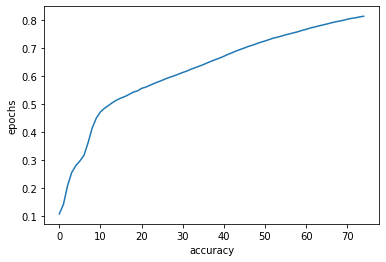

In [20]:
plt.plot(history.history['accuracy'])
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.show()

In [21]:
pred = model.predict(x_test)

313/313 [==============================] - 0s 603us/step


In [28]:
ar = []
for a,i in enumerate(pred):
    ar.append(np.argmax(i))

In [29]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
ar = np.array(ar)

In [31]:
ar

array([7, 2, 1, ..., 4, 8, 6], dtype=int64)

In [32]:
from sklearn import metrics

In [33]:
print(metrics.accuracy_score(y_test2,ar))

0.824


In [34]:
print(metrics.classification_report(y_test2,ar))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       980
           1       0.83      0.97      0.90      1135
           2       0.86      0.81      0.83      1032
           3       0.75      0.88      0.81      1010
           4       0.78      0.87      0.82       982
           5       0.91      0.45      0.60       892
           6       0.84      0.92      0.88       958
           7       0.83      0.87      0.85      1028
           8       0.81      0.73      0.77       974
           9       0.81      0.73      0.77      1009

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.81     10000
weighted avg       0.83      0.82      0.82     10000



In [36]:
print(metrics.confusion_matrix(y_test2,ar))

[[ 943    0    5    5    1    2   17    2    5    0]
 [   0 1099    8    3    0    0    4    1   20    0]
 [  18   43  832   30   22    0   35   22   30    0]
 [   5    6   31  891    0   16    8   25   20    8]
 [   2   13    4    0  851    0   30    2    7   73]
 [  49   44   20  164   45  401   41   47   59   22]
 [  28   15   10    2    7    6  880    1    9    0]
 [   4   45   29    2   15    0    3  894    6   30]
 [  16   38   22   84   14   11   23   17  715   34]
 [  18   16   11   13  133    3    7   66    8  734]]
